## Run python_fmask on full tiles 

This script requires execution in a conda environment to successfully run fmask due to osgeo / RIOS dependencies.

In [11]:
import os
from retry import retry
os.environ["CPLUS_INCLUDE_PATH"] = "/usr/include/gdal"
os.environ["C_INCLUDE_PATH"] = "/usr/include/gdal"
# import rasterio
# import osgeo  # Only import if you need it, and do so after rasterio if required

#### Start in the parent directory of the SAFE folder, where all your safe archive files are located

In [ ]:
pwd = os.getcwd()
pwd

In [13]:
# Clone and install RIOS from source
!git clone https://github.com/ubarsc/rios.git
%cd rios
!pip install .
%cd ..
!export PATH="/content/riosbin:$PATH"

Cloning into 'rios'...
remote: Enumerating objects: 3804, done.
remote: Counting objects: 100% (616/616), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 3804 (delta 512), reused 379 (delta 378), pack-reused 3188 (from 3)
Receiving objects: 100% (3804/3804), 1.10 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (2525/2525), done.
/Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/rios
Processing /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/rios
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rios: filename=rios-2.0.7-py3-none-any.whl size=223489 sha256=96f41f876528b809637a8e2535791f04206f41d47b316bbaa2d49556ae87bf31
  Stored in directory: /private/var/folders/3w/mwdjnd7d6v315dxz6p1f06jc0000gn/T/pip-ephem-wheel-cache-yiv2yb74/wheels/c3/1c/f0/bf1ce5747f62af084849fac22a8d0f5cf36d3be11cea7afbd0
Successful

In [5]:
# Clone Fmask (GERSL version)
!git clone https://github.com/ubarsc/python-fmask
%cd python-fmask
!pip install .
%cd ..
!export PATH="/content/python-fmask/bin:$PATH"

Cloning into 'python-fmask'...
remote: Enumerating objects: 1522, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 1522 (delta 254), reused 241 (delta 222), pack-reused 1229 (from 1)
Receiving objects: 100% (1522/1522), 338.28 KiB | 5.54 MiB/s, done.
Resolving deltas: 100% (1106/1106), done.
/Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/python-fmask
Processing /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/python-fmask
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-fmask: filename=python_fmask-0.5.10-cp312-cp312-macosx_11_0_arm64.whl size=98059 sha256=321d4b0de6b5e1bb75b87f96af65e43b05c2718ee6ea1f2a8fd92d3dcf5a6fd8
  Stored in directory: /Users/sara_mac/Library/Caches/pip/wheels/5f/f9/84/6922e3284b9a92f063acc576e0f649285e684ee5fb00b51aa0
Succes

In [ ]:
# Clone Fmask (GERSL version)
!git clone https://github.com/ubarsc/python-fmask

# replace commandline function sentinel2Stacked.py with updated version present in current directory
!rm -rf ./python-fmask/fmask/cmdline/sentinel2Stacked.py
!cp ./sentinel2Stacked.py ./python-fmask/fmask/cmdline/sentinel2Stacked.py #Local version
!chmod +x ./python-fmask/fmask/cmdline/sentinel2Stacked.py
# Install the modified version of Fmask
%cd python-fmask
!pip install .
%cd ..
!export PATH="/content/python-fmask/bin:$PATH"

Cloning into 'python-fmask'...
remote: Enumerating objects: 1522, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 1522 (delta 254), reused 241 (delta 222), pack-reused 1229 (from 1)
Receiving objects: 100% (1522/1522), 338.28 KiB | 5.73 MiB/s, done.
Resolving deltas: 100% (1106/1106), done.
/Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/python-fmask
Processing /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/python-fmask
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-fmask: filename=python_fmask-0.5.10-cp312-cp312-macosx_11_0_arm64.whl size=98008 sha256=c5a271981cfa8eca08451717fc119ae9a210242dd326a0ffa924503c83a2e338
  Stored in directory: /Users/sara_mac/Library/Caches/pip/wheels/5f/f9/84/6922e3284b9a92f063acc576e0f649285e684ee5fb00b51aa0
Succes

In [22]:
from rios.imagewriter import DEFAULTDRIVERNAME, dfltDriverOptions
DEFAULTDRIVERNAME = "GTiff"  # Force GeoTIFF to avoid broken .img output
from fmask.cmdline import sentinel2Stacked


In [16]:
pwd = os.getcwd()
base_path = os.path.join(pwd, 'SAFE')
# base_path = os.path.dirname(os.path.dirname(os.path.abspath('S2B_MSIL1C_20190406T100029_N0500_R122_T33TUL_20231115T010625.SAFE')))

for safe_file in os.listdir(base_path):
    if safe_file.endswith('.SAFE'):
        safe_dir = os.path.join(base_path, safe_file)
        out_path = os.path.join(safe_dir, 'cloud.tif')
        !fmask_sentinel2Stacked -v -o "{out_path}" --safedir "{safe_dir}" --pixsize 10

Making angles image
Making stack of all bands, at 10m pixel size
^C
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/littermapper/lib/python3.12/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/littermapper/lib/python3.12/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/littermapper/lib/python3.12/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/littermapper/bin/fmask_sentinel2Stacked", line 8, in <module>
    sys.exit(mainRoutine())
             ^^^^^^^^^^^^^
  File "/o

## Delete temporary files and clones repositories

In [17]:
# delete temp files created by fmask process if you want to remove them from your local machine

def delete_temp_files_in_directory(directory_path):
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path) and file_name.startswith('tmp_') or file_name.startswith('angles_tmp_'):
            os.remove(file_path)
            print(f"Deleted: {file_path}")


delete_temp_files_in_directory(pwd)

Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B09_zvxx3z_t.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B11_ljja2zgb.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B06_s9jmt9yw.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B02_bcap7vly.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/angles_tmp_yupknv4x.img
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B04_jm8295q6.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B06_feowiztb.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B07_kykfbp81.vrt
Deleted: /Users/sara_mac/Desktop/projects/plastic_detection/mapper/MAP-Mapper/new_mask/tmp_B8A_hj5n5yq3.vrt
Deleted: /Users/sara_mac/

In [18]:
# Remove cloned repositories if you want to clean up your local machine
!rm -rf ./rios
!rm -rf ./python-fmask

## Create patch level fmask classes

In [ ]:
import rasterio
import numpy as np
import os
from rasterio.windows import from_bounds
from rios.imagewriter import DEFAULTDRIVERNAME, dfltDriverOptions
DEFAULTDRIVERNAME = "GTiff"  # Force GeoTIFF output instead of HFA

In [ ]:
# Set path to safe file dir with cloud.tif already created byfmask inside and 
# ensure folder with cropped patches for each tile are in the same directory or 
# replace dir_path in second line as needed
pwd = os.getcwd()
base_path = os.path.join(pwd, 'SAFE')
dir_path = base_path
path_patches = sorted([f for f in os.listdir(dir_path) if f.startswith('S2') and not f.endswith('.SAFE') and os.path.isdir(os.path.join(dir_path, f))])

In [ ]:

def extract_patch_from_tif(tif_path, utm_bounds, output_path=None):
    """
    Extracts a patch from a GeoTIFF file based on UTM bounds.
    Parameters:
        tif_path (str): Path to the input .tif file.
        utm_bounds (tuple): (min_x, min_y, max_x, max_y) in UTM coordinates.
        output_path (str, optional): If provided, saves the patch to this path.
    Returns:
        patch (np.ndarray): Extracted patch as a NumPy array.
        patch_profile (dict): Rasterio profile (metadata) of the patch.
    """
    with rasterio.open(tif_path) as src:
        # Calculate the window from the UTM bounds
        window = from_bounds(*utm_bounds, transform=src.transform)
        window = window.round_offsets().round_lengths()
        # Read the data from the window
        patch = src.read(window=window)
        patch_profile = src.meta.copy()
        # Update metadata for the patch
        patch_profile.update({
            "height": window.height,
            "width": window.width,
            "transform": rasterio.windows.transform(window, src.transform)
        })
        # Optionally save the patch
        if output_path:
            with rasterio.open(output_path, "w", **patch_profile) as dst:
                dst.write(patch)
    return patch, patch_profile

In [ ]:
def get_patch_utm_bounds(min_x, min_y, patch_size=256, res=10):
    max_x = min_x + patch_size * res
    max_y = min_y + patch_size * res
    return (min_x, min_y, max_x, max_y)

In [ ]:
# Match cloud tif and crop to patch bounds for all patches in directory

for patch in path_patches:
  patch_files = os.listdir(os.path.join(dir_path, patch))
  for file in patch_files:
    if file.endswith('_cl.tif'):
        bounds = file.split('_')[5:7]
        utm_0 = int(bounds[0])
        utm_1 = int(bounds[1])
        patch_utm = get_patch_utm_bounds(utm_0, utm_1)
        print(patch_utm)
        #cloud_tif name construction
        if '_N0500' not in file:
            parts = file.split('_')
            if len(parts) > 3 and parts[0].startswith('S2'):
                # Insert _N0500 after the date field (4th part: index 2)
                parts.insert(3, 'N0500')
                new_filename = '_'.join(parts[:5])
        for safe_file in os.listdir(dir_path):
            if safe_file.startswith(new_filename) and safe_file.endswith('.SAFE'):
                cloud_path = os.path.join(dir_path, safe_file, 'cloud.tif')
        output_path = os.path.join(dir_path, patch, file[:-6]+'cloud.tif')
        print(f'cloud patch: {cloud_path}')
        print(f'output patch: {output_path}')
        extract_patch_from_tif(cloud_path, patch_utm, output_path)

## Visualise patches 
(this will loop through all patches in the patch subdirectories, so proceed with caution if dealing with large batches of tiles)

In [ ]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

patch: S2B_MSIL1C_20190406T100029_R122_T33TUL_315360_5030880


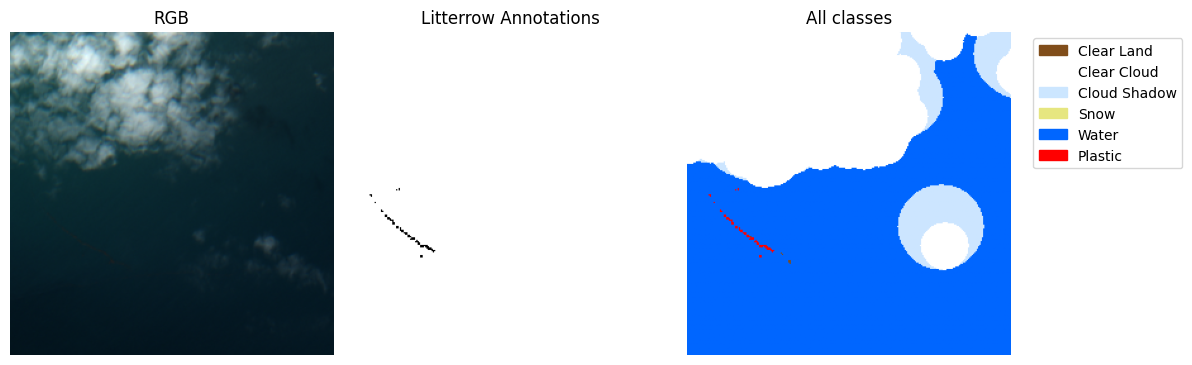

patch: S2B_MSIL1C_20190406T100029_R122_T33TUL_351200_5051360


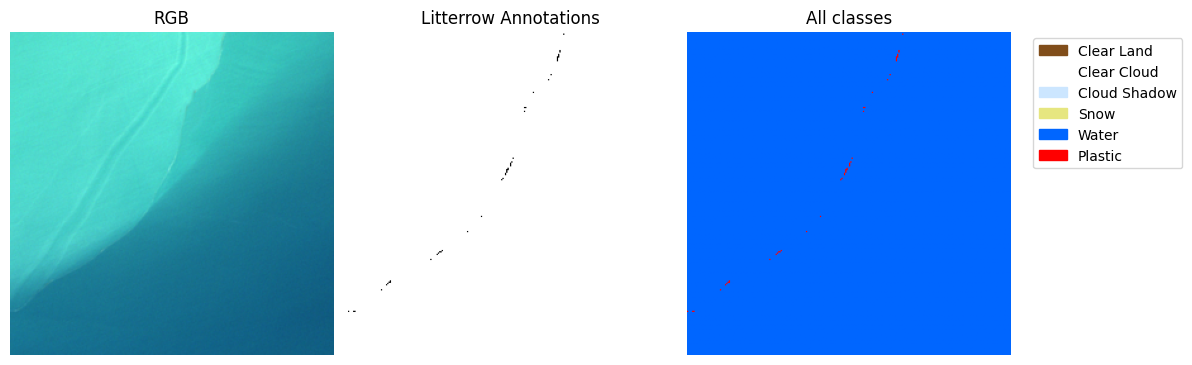

patch: S2B_MSIL1C_20190516T100039_R122_T33TUL_384480_5059040


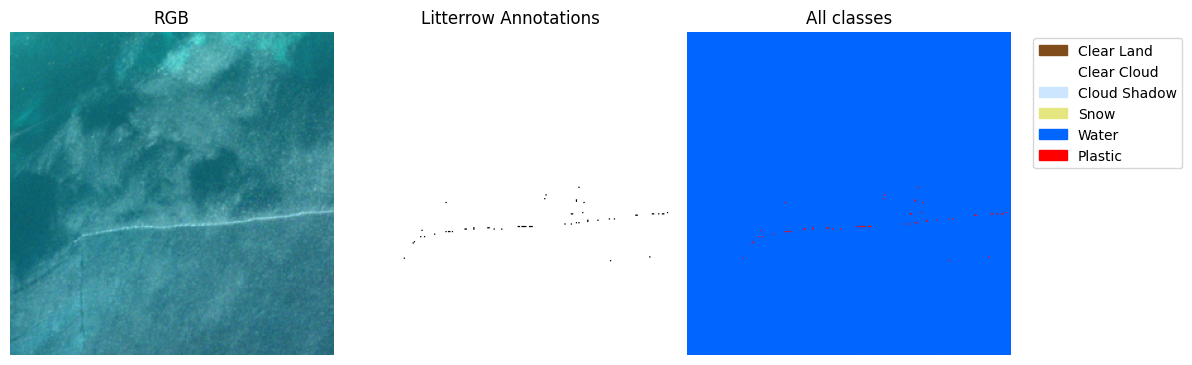

patch: S2B_MSIL1C_20190516T100039_R122_T33TUL_361440_5064160


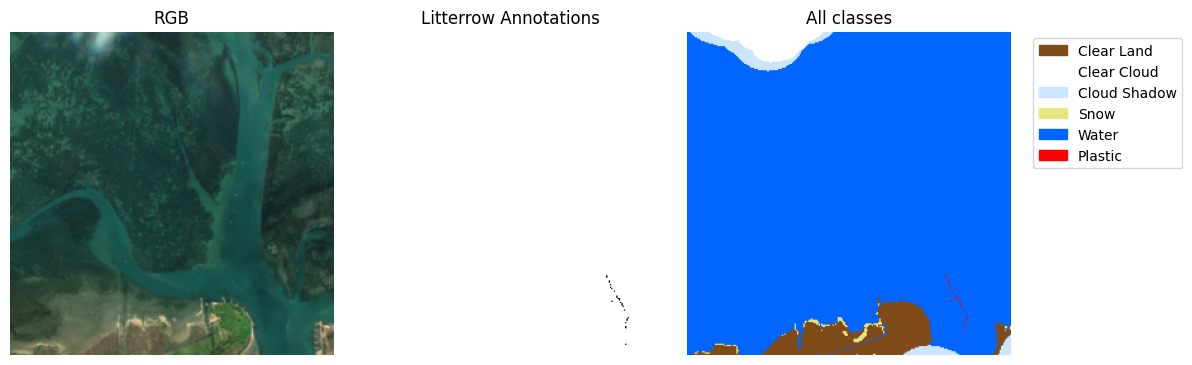

patch: S2B_MSIL1C_20190516T100039_R122_T33TUL_358880_5061600


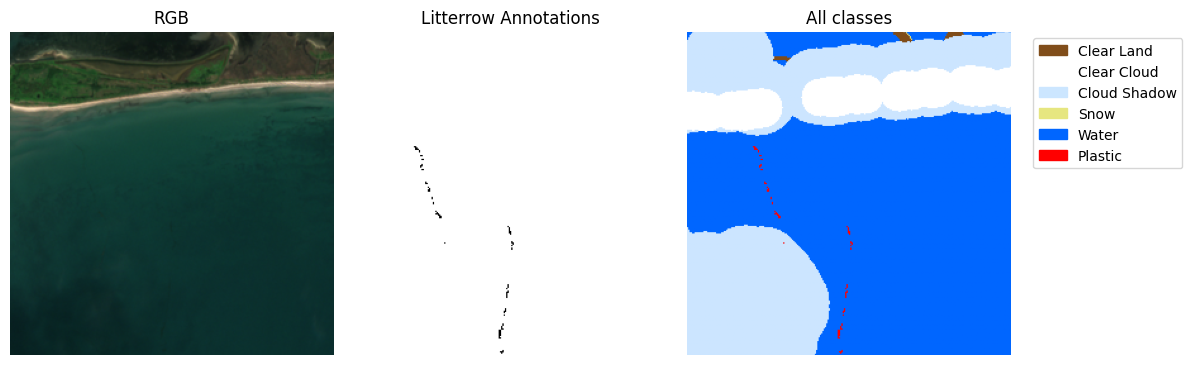

In [ ]:

# Define your directory and patch list again if needed
pwd = os.getcwd()
base_path = os.path.join(pwd, 'SAFE')
dir_path = base_path
path_patches = sorted([f for f in os.listdir(dir_path) if f.startswith('S2') and not f.endswith('.SAFE') and os.path.isdir(os.path.join(dir_path, f))])


# Define class metadata in a single structure
class_metadata = [
    {"name": "Clear Land",   "value": 1,    "color": (0.5, 0.3, 0.1, 1.0)},  # Brown
    {"name": "Clear Cloud",  "value": 2,    "color": (1.0, 1.0, 1.0, 1.0)},  # White
    {"name": "Cloud Shadow", "value": 3,    "color": (0.8, 0.9, 1.0, 1.0)},  # Light Blue
    {"name": "Snow",         "value": 4,    "color": (0.9, 0.9, 0.5, 1.0)},  # Sand
    {"name": "Water",        "value": 5,    "color": (0.0, 0.4, 1.0, 1.0)},  # Blue
    {"name": "Plastic",      "value": 6,    "color": (1.0, 0.0, 0.0, 1.0)},  # Red
]


class_labels = [item["name"] for item in class_metadata]
class_colors = {i+1: item["color"] for i, item in enumerate(class_metadata)}


for patch in path_patches:
    patch_dir = os.path.join(dir_path, patch)
    if not os.path.isdir(patch_dir):
        continue
    patch_files = os.listdir(patch_dir)
    
    for file in patch_files:
        if file.endswith('_cl.tif'):
            print(f'patch: {file[:-7]}')
            plastic_mask_path = os.path.join(patch_dir, file[:-6] + 'cl.tif')
            cloud_path = os.path.join(patch_dir, file[:-6] + 'cloud.tif')
            original_path = os.path.join(patch_dir, file[:-7] + '.tif')
            
            with rasterio.open(cloud_path) as src:
                fmask_data = src.read(1)
            with rasterio.open(plastic_mask_path) as src:
                plastic_data = src.read(1)

            # Combine cloud and plastic detections
            combined_mask = np.copy(fmask_data)
            combined_mask[np.where(plastic_data == 1)] = 6
            # Read RGB
            with rasterio.open(original_path) as src_rgb:
                rgb = np.stack([src_rgb.read(b) for b in [4, 3, 2]], axis=-1).astype(np.float32)
                rgb /= rgb.max()  # Normalize

            # Create color-mapped overlay
            colored_mask = np.zeros((*combined_mask.shape, 4))
            for class_val, color in class_colors.items():
                colored_mask[combined_mask == class_val] = color
            
            # Plotting
            fig, axes = plt.subplots(1, 3, figsize=(12, 6))
            axes[0].imshow(np.clip(rgb, 0, 1))
            axes[0].set_title('RGB Image')
            axes[0].axis('off')

            axes[1].imshow(np.clip(plastic_data, 0, 1), cmap='binary')
            axes[1].set_title('Litterrow Annotations')
            axes[1].axis('off')

            axes[2].imshow(colored_mask)
            axes[2].set_title("All classes")
            axes[2].axis('off')
            legend_patches = [
                mpatches.Patch(color=item["color"], label=item["name"])
                for item in class_metadata
            ]

            plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()